<H1 style ="text-align: center",> Data Science Jobs Analysis</H1>
<p style="text-align: justify;"> Data science is the domain of study that deals with vast volumes of data using modern tools and techniques to find unseen patterns, derive meaningful information, and make business decisions. Data science uses complex machine learning algorithms to build predictive models.
The data used for analysis can come from many different sources and be presented in various formats. Data science is an essential part of many industries today, given the massive amounts of data that are produced, and is one of the most debated topics in IT circles.</p>

### 1: Importing Libraries
* **Numpy:** NumPy is a Python library used for working with arrays.
* **Pandas:** Pandas is use for data analysis and manipulation.
* **Matplotlib:** Matplotlib is use for creating static, animated, and interactive visualizations.
* **Seaborn:** Seaborn is a library for making statistical graphics.

In [47]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2: Reading the CSV File

In [48]:
df = pd.read_csv('C:/Users/tyagi/Downloads/ds.salaries.csv')

### 3: Understand the Data

In [49]:
df.shape

(607, 12)

* Data contain 607 rows and 12 column

In [50]:
df.columns.tolist() #to print the column heading of data frame

['Unnamed: 0',
 'work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [51]:
df.head(5) # to print the top five rows of the dataframe

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [52]:
df.info() # to print the summeries info of all the columns of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [53]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


### 3: Cleaning the Data
* Checking the Null Values
* Checking the Duplicate Values

In [54]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

* There is no null value present in the dataframe.

In [55]:
df.duplicated().sum()

0

* There are no duplicate values present in the dataframe

### 4: Convert the type of data Variable to Catagory

* Experience Level
* Employment Type
* Company Size
* Job Title

In [56]:
df['experience_level'] = df['experience_level'].astype('category')
experience_level= ['EN', 'MI', 'SE', 'EX']
df["experience_level"] = df["experience_level"].cat.reorder_categories(experience_level)

df['employment_type']=df['employment_type'].astype('category')
employment_type=['PT','FT', 'FL', 'CT']
df['employment_type']= df["employment_type"].cat.reorder_categories(employment_type)

df['company_size']=df['company_size'].astype('category')
company_size=['S','M','L']
df['company_size']= df["company_size"].cat.reorder_categories(company_size)

### 5: Add new column based on the Salary Currency column.

In [57]:
def country_cat(row):
    if row['salary_currency'] == 'USD':
        return 'USA'
    elif row['salary_currency'] == 'EUR':
        return 'Eurozone'
    elif row['salary_currency'] == 'GBP':
        return 'UK'
    elif row['salary_currency'] == 'INR':
        return 'India'
    elif row['salary_currency'] == 'CAD':
        return 'Canada'
    elif row['salary_currency'] == 'JPY':
        return 'Japan'
    elif row['salary_currency'] == 'PLN':
        return 'Poland'
    elif row['salary_currency'] == 'TRY':
        return 'Turkey'
    elif row['salary_currency'] == 'CNY':
        return 'China'
    elif row['salary_currency'] == 'MXN':
        return 'Mexico'
    elif row['salary_currency'] == 'HUF':
        return 'Hungary'
    elif row['salary_currency'] == 'DKK':
        return 'Denmark'
    elif row['salary_currency'] == 'BRL':
        return 'Brazil'
    elif row['salary_currency'] == 'AUD':
        return 'Australia'
    elif row['salary_currency'] == 'CLP':
        return 'Chile'
    elif row['salary_currency'] == 'CHF':
        return 'Switzerland'

df['country'] = df.apply(lambda row: country_cat(row), axis=1)

### 6: UniVariate Analysis

* **Job Count Based on:**
    * Experience Level
    * Employment Type
    * Company Size
    * Remote Ratio

**Filter the data based on the Work Year**

In [58]:
df1=df.query("work_year == 2020")
df2=df.query("work_year == 2021")
df3=df.query("work_year == 2022")

<H3 style ="text-align: center",>JOB COUNT BASED ON THE EXPERIENCE LEVEL (2020-2022)</H3>

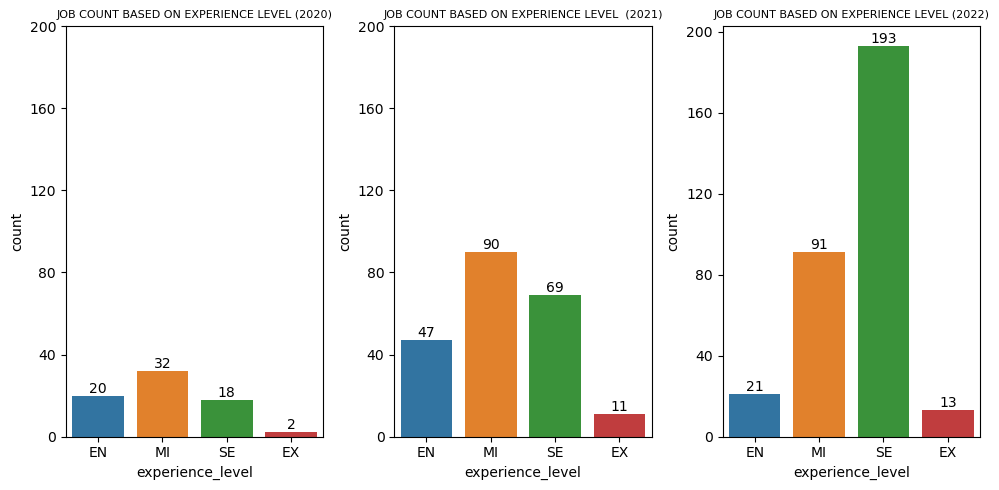

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(10,5))
chart1 = sns.countplot(data=df1, x="experience_level",  ax=axes[0])
chart1.set_title('JOB COUNT BASED ON EXPERIENCE LEVEL (2020)', fontdict={'size': 8})
chart1.set_yticks([0,40,80,120,160,200])
fig.tight_layout()
for i in chart1.containers:
    chart1.bar_label(i,)
chart2 = sns.countplot(data=df2, x="experience_level",  ax=axes[1])
chart2.set_title('JOB COUNT BASED ON EXPERIENCE LEVEL  (2021)', fontdict={'size': 8})
chart2.set_yticks([0,40,80,120,160,200])
fig.tight_layout()
for i in chart2.containers:
    chart2.bar_label(i,)
chart3 = sns.countplot(data=df3, x="experience_level",  ax=axes[2])
chart3.set_title('JOB COUNT BASED ON EXPERIENCE LEVEL (2022)', fontdict={'size': 8})
chart3.set_yticks([0,40,80,120,160,200])
fig.tight_layout()
for i in chart3.containers:
    chart3.bar_label(i,)

* We find that there are more jobs for entry level experience in the year 2021 as compared to the year 2020,2022
* Compared to the year 2020, the job increased for mid level experience in the year 2021 but after that there is no such change in the year 2022
* The year 2022 is far better than both 2020 and 2021 for senior level experience as the number of job openings has increased.
* But for executive level experience the job count is down in all the three years, there is no major increase in the job count from 2021 to 2022

<H3 style ="text-align: center",>JOB COUNT BASED ON THE EMPLOYMENT TYPE (2020-2022)</H3>

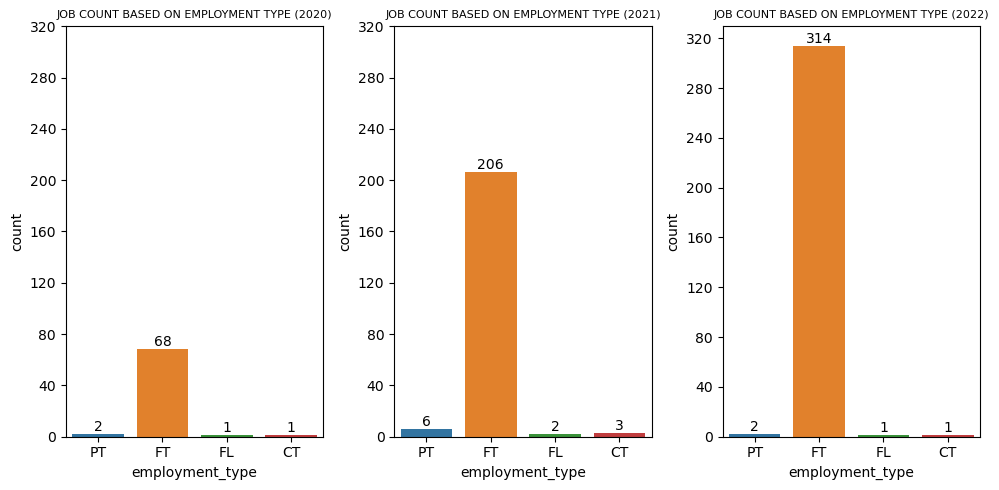

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(10,5))
chart1 = sns.countplot(data=df1, x="employment_type",  ax=axes[0])
chart1.set_title('JOB COUNT BASED ON EMPLOYMENT TYPE (2020)', fontdict={'size': 8})
chart1.set_yticks([0,40,80,120,160,200,240,280,320])
fig.tight_layout()
for i in chart1.containers:
    chart1.bar_label(i,)
chart2 = sns.countplot(data=df2, x="employment_type",  ax=axes[1])
chart2.set_title('JOB COUNT BASED ON EMPLOYMENT TYPE (2021)', fontdict={'size': 8})
chart2.set_yticks([0,40,80,120,160,200,240,280,320])
fig.tight_layout()
for i in chart2.containers:
    chart2.bar_label(i,)
chart3 = sns.countplot(data=df3, x="employment_type",  ax=axes[2])
chart3.set_title('JOB COUNT BASED ON EMPLOYMENT TYPE (2022)', fontdict={'size': 8})
chart3.set_yticks([0,40,80,120,160,200,240,280,320])
fig.tight_layout()
for i in chart3.containers:
    chart3.bar_label(i,)

* The year 2020 to 2022 was a golden time for the aspirants who are looking for a full time job, because there is a huge increase in the number of job openings from the year 2020 to 2021 and from the year 2021 to 2022.

<H3 style ="text-align: center",>JOB COUNT BASED ON THE COMPANY SIZE (2020-2022)</H3>

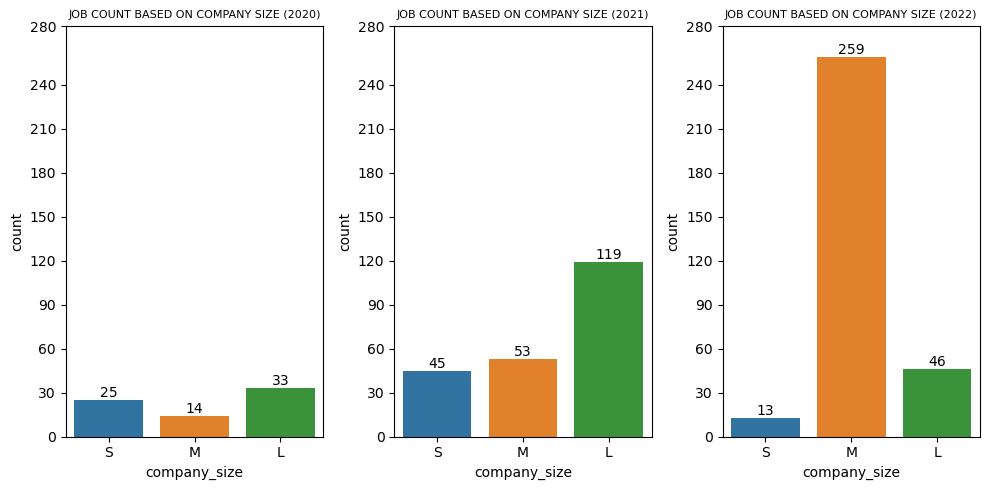

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(10,5))
chart1 = sns.countplot(data=df1, x="company_size",  ax=axes[0])
chart1.set_title('JOB COUNT BASED ON COMPANY SIZE (2020)', fontdict={'size': 8})
chart1.set_yticks([0,30,60,90,120,150,180,210,240,280])
fig.tight_layout()
for i in chart1.containers:
    chart1.bar_label(i,)
chart2 = sns.countplot(data=df2, x="company_size",  ax=axes[1])
chart2.set_title('JOB COUNT BASED ON COMPANY SIZE (2021)', fontdict={'size': 8})
chart2.set_yticks([0,30,60,90,120,150,180,210,240,280])
fig.tight_layout()
for i in chart2.containers:
    chart2.bar_label(i,)
chart3 = sns.countplot(data=df3, x="company_size",  ax=axes[2])
chart3.set_title('JOB COUNT BASED ON COMPANY SIZE (2022)', fontdict={'size': 8})
chart3.set_yticks([0,30,60,90,120,150,180,210,240,280])
fig.tight_layout()
for i in chart3.containers:
    chart3.bar_label(i,)

* As the year 2020 was the pandemic period, so we can see that the job numbers of all the three types of companies are very less as compared to the other two years.
* If we take the three years graph we can find that there is no increase in the number of jobs for small size company as compared to medium size or large size company. Maybe it's because of the pandemic.
* After two consolidated years (2020-2021) the year 2022 was the best period for job seekers in medium sized companies, as we can see in the graph that there is a huge increase in the number of job openings in 2022.
* After 2020 big size companies try to hire new employees in 2021 but in 2022 we can see that again there is decrease in number of job.

<H3 style ="text-align: center",>JOB COUNT BASED ON THE REMOTE BASED (2020-2022)</H3>

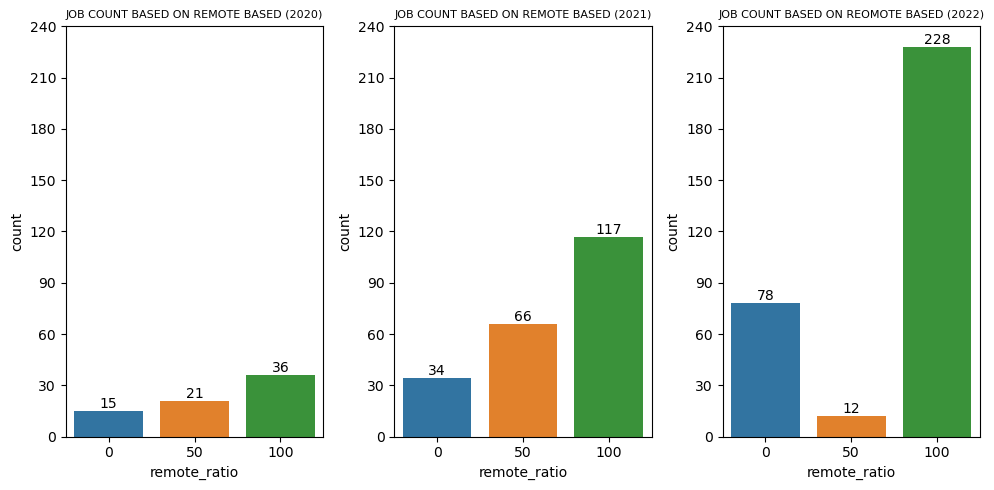

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(10,5))
chart1 = sns.countplot(data=df1, x="remote_ratio",  ax=axes[0])
chart1.set_title('JOB COUNT BASED ON REMOTE BASED (2020)', fontdict={'size': 8})
chart1.set_yticks([0,30,60,90,120,150,180,210,240])
fig.tight_layout()
for i in chart1.containers:
    chart1.bar_label(i,)
chart2 = sns.countplot(data=df2, x="remote_ratio",  ax=axes[1])
chart2.set_title('JOB COUNT BASED ON REMOTE BASED (2021)', fontdict={'size': 8})
chart2.set_yticks([0,30,60,90,120,150,180,210,240])
fig.tight_layout()
for i in chart2.containers:
    chart2.bar_label(i,)
chart3 = sns.countplot(data=df3, x="remote_ratio",  ax=axes[2])
chart3.set_title('JOB COUNT BASED ON REOMOTE BASED (2022)', fontdict={'size': 8})
chart3.set_yticks([0,30,60,90,120,150,180,210,240])
fig.tight_layout()
for i in chart3.containers:
    chart3.bar_label(i,)

* Again we can find that Year 2020 was the bad time for employment, as the job count for all three Job Working Style has less in numbers as compared to other years.
* we can find that 2021 was the best period for the Hybrid Mode Job as compared to 2020 and 2022.
* We can find that the job count for 

### 7: BiVariate Analysis

* **TOP RANKED JOB:**
* **TOP RANKED SALARY JOB**
* **TOP RANKED ANNUAL SALARY PACKAGE OFFERING COUNTRIES (2020-2022)**
* **JOB TITLE CONTAINING MACHINE LEARNING, ANALYST, DATA SCIENTIST, DATA ENGINEER**
* **SALARY VARIATION BASED ON:**
    * Experience Level
    * Employment Type
    * Company Size
    * Remote Ratio
* **REMOTE RATIO BASED ON COMPANY SIZE (2020-2022)**
* **REMOTE RATIO BASED ON EXPERIENCE LEVEL (2020-2022)**

<H3 style ="text-align: center",>TOP RANKED JOB (2020-2022)</H3>

In [63]:
df4 = df1['job_title'].value_counts()[0:3]
df5 = df2['job_title'].value_counts()[0:3]
df6 = df3['job_title'].value_counts()[0:3]

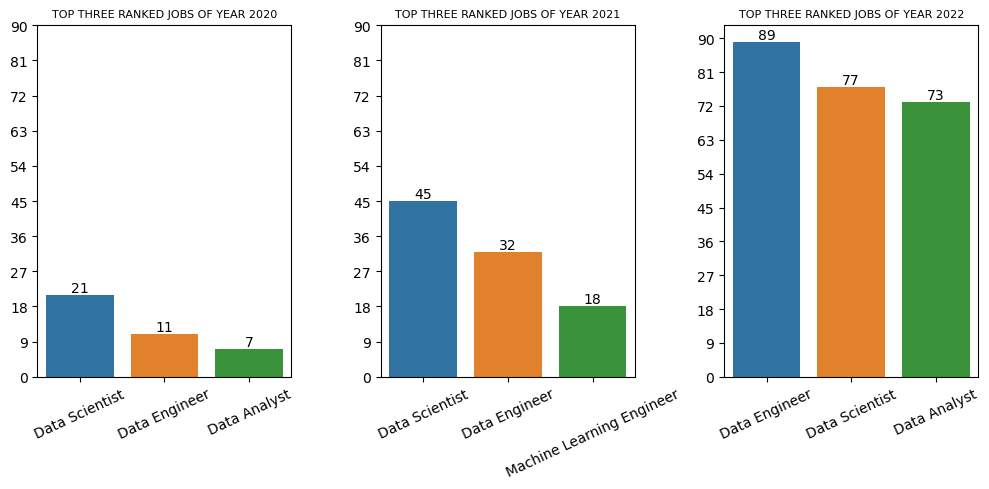

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(10,5))
chart1 = sns.barplot(y=df4.values, x=df4.index,  ax=axes[0])
chart1.set_title('TOP THREE RANKED JOBS OF YEAR 2020', fontdict={'size': 8})
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=25)
chart1.set_yticks([0,9,18,27,36,45,54,63,72,81,90])
fig.tight_layout()
for i in chart1.containers:
    chart1.bar_label(i,)
chart2 = sns.barplot(y=df5.values, x=df5.index,  ax=axes[1])
chart2.set_title('TOP THREE RANKED JOBS OF YEAR 2021', fontdict={'size': 8})
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=25)
chart2.set_yticks([0,9,18,27,36,45,54,63,72,81,90])
fig.tight_layout()
for i in chart2.containers:
    chart2.bar_label(i,)
chart3 = sns.barplot(y=df6.values, x=df6.index,  ax=axes[2])
chart3.set_title('TOP THREE RANKED JOBS OF YEAR 2022', fontdict={'size': 8})
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=25)
chart3.set_yticks([0,9,18,27,36,45,54,63,72,81,90])
fig.tight_layout()
for i in chart3.containers:
    chart3.bar_label(i,)

* From 2020 to 2022, there is a steady increase in the job count in Data Scientist. Also it holds the first position among all other jobs in the year 2020 and 2021.
* After two years Data Engineer job takes first position among all other jobs in 2022 and after two years Data Scientist job takes second position.
* Only in 2021 machine learning engineer comes in third place otherwise data analyst was third highest job in rest of the years.

<H3 style ="text-align: center",>TOP RANKED SALARY JOB (2020-2022)</H3>

**Note:** All the average salary from here below is not monthly salary but it is salary per year or we can also say average annual salary package.

In [65]:
dfa = round(df1.groupby('job_title')['salary_in_usd'].mean().reset_index())
dfa=dfa.nlargest(3,['salary_in_usd'])
dfb = round(df2.groupby('job_title')['salary_in_usd'].mean().reset_index())
dfb=dfb.nlargest(3,['salary_in_usd'])
dfc = round(df3.groupby('job_title')['salary_in_usd'].mean().reset_index())
dfc=dfc.nlargest(3,['salary_in_usd'])

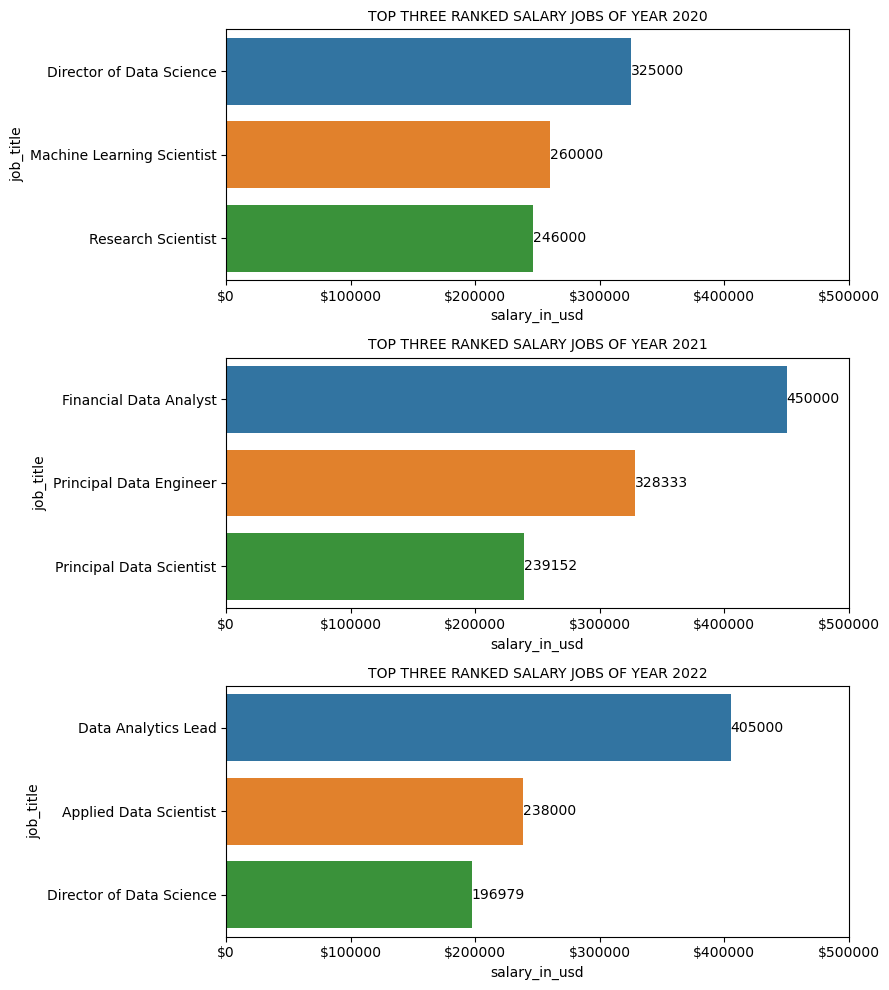

In [66]:
fig, axes = plt.subplots(3, 1, figsize=(9,10))
chart1 = sns.barplot(data = dfa,y='job_title', x='salary_in_usd',  ax=axes[0])
chart1.set_title('TOP THREE RANKED SALARY JOBS OF YEAR 2020', fontdict={'size': 10})
chart1.set_xticks([0,100000,200000,300000,400000,500000])
chart1.xaxis.set_major_formatter('${x:1.0f}')
fig.tight_layout()
for i in chart1.containers:
    chart1.bar_label(i,)
chart2 = sns.barplot(data = dfb,y='job_title', x='salary_in_usd',  ax=axes[1])
chart2.set_title('TOP THREE RANKED SALARY JOBS OF YEAR 2021', fontdict={'size': 10})
chart2.set_xticks([0,100000,200000,300000,400000,500000])
chart2.xaxis.set_major_formatter('${x:1.0f}')
fig.tight_layout()
for i in chart2.containers:
    chart2.bar_label(i,)
chart3 = sns.barplot(data = dfc,y='job_title', x='salary_in_usd',  ax=axes[2])
chart3.set_title('TOP THREE RANKED SALARY JOBS OF YEAR 2022', fontdict={'size': 10})
chart3.set_xticks([0,100000,200000,300000,400000,500000])
chart3.xaxis.set_major_formatter('${x:1.0f}')
fig.tight_layout()
for i in chart3.containers:
    chart3.bar_label(i,)

* The top three ranked salaries from 2020 to 2022 are the only jobs for directors of data science. Which has highest salary in 2020 (i.e. 325000 in USD) and 3rd highest salary in 2022 (around 197000 in USD).
* There is no other job that has been offering the top highest salary other than Director of Data Science.
* In all the three years we can find that the top paid jobs are Financial Data Analyst with an average salary of USD 450000 in 2021, Data Analytics Lead with an average salary of USD 405000 in 2022 and Principal Data Engineer with an average salary of USD 328333 in 2021.

<H3 style ="text-align: center",>TOP RANKED ANNUAL SALARY PACKAGE OFFERING COUNTRIES (2020-2022)</H3>

* **ABBREVIATION USED FOR CURRENCY**

    * USD: USA       
    * EUR: Eurozone       
    * GBP: United Kingdom       
    * INR: India      
    * CAD: Canada      
    * JPY: Japan       
    * PLN: Poland      
    * TRY: Turkey      
    * CNY: China      
    * MXN: Mexico      
    * HUF: Hungary      
    * DKK: Denmark      
    * BRL: Brazil      
    * AUD: Australia      
    * CLP: Chili      
    * CHF: Switzerland

In [67]:
dfd = round(df1.groupby(['country', 'job_title','salary_currency'])['salary'].mean().reset_index())
dfd=dfd.nlargest(3,['salary'])
print(dfd)
print("\n")
dfe = round(df2.groupby(['country', 'job_title','salary_currency'])['salary'].mean().reset_index())
dfe=dfe.nlargest(3,['salary'])
print(dfe)
print("\n")
dff = round(df3.groupby(['country','job_title','salary_currency'])['salary'].mean().reset_index())
dff = dff.drop([19, 20])
dff=dff.nlargest(3,['salary'])
print(dff)

    country       job_title salary_currency      salary
12  Hungary  Data Scientist             HUF  11000000.0
17    Japan   Data Engineer             JPY   4450000.0
15    India  Data Scientist             INR   3000000.0


    country        job_title salary_currency      salary
8     Chile   Data Scientist             CLP  30400000.0
24  Hungary  BI Data Analyst             HUF  11000000.0
34    Japan      ML Engineer             JPY   7750000.0


   country                 job_title salary_currency     salary
21   India  Head of Machine Learning             INR  6000000.0
36     USA       Data Analytics Lead             USD   405000.0
4   Canada  Director of Data Science             CAD   250000.0


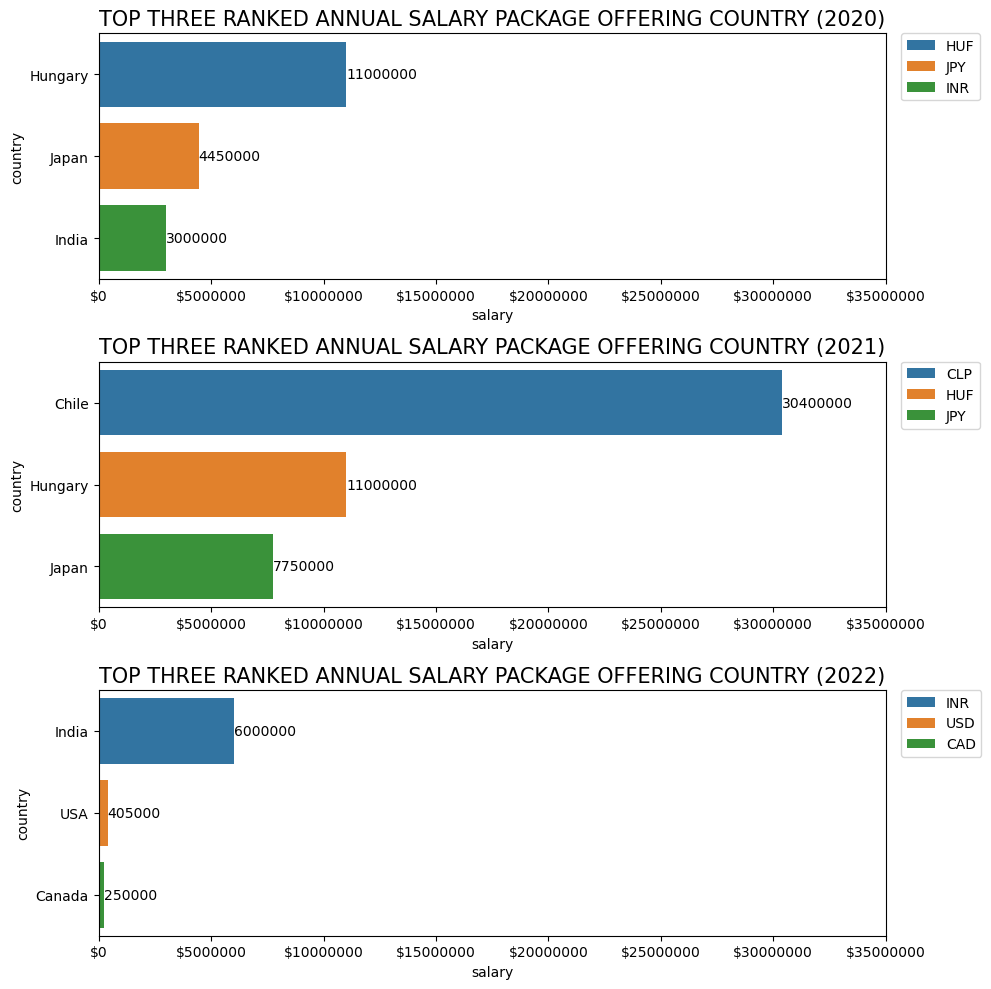

In [68]:
fig, axes = plt.subplots(3, 1, figsize=(10,10))
chart1 = sns.barplot(data = dfd,y='country', x='salary',  ax=axes[0], ci = None, hue = 'salary_currency',dodge=False)
chart1.set_title('TOP THREE RANKED ANNUAL SALARY PACKAGE OFFERING COUNTRY (2020)', fontdict={'size': 15})
chart1.set_xticks([0,5000000,10000000,15000000,20000000,25000000,30000000,35000000])
chart1.get_xaxis().get_major_formatter().set_scientific(False)
chart1.xaxis.set_major_formatter('${x:1.0f}')
fig.tight_layout()
for i in chart1.containers:
    chart1.bar_label(i,fmt = '%d')
chart1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
chart2 = sns.barplot(data = dfe,y='country', x='salary',  ax=axes[1], ci = None, hue = 'salary_currency',dodge=False)
chart2.set_title('TOP THREE RANKED ANNUAL SALARY PACKAGE OFFERING COUNTRY (2021)', fontdict={'size': 15})
chart2.set_xticks([0,5000000,10000000,15000000,20000000,25000000,30000000,35000000])
chart2.get_xaxis().get_major_formatter().set_scientific(False)
chart2.xaxis.set_major_formatter('${x:1.0f}')
fig.tight_layout()
for i in chart2.containers:
    chart2.bar_label(i,fmt = '%d')
chart2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
chart3 = sns.barplot(data = dff,y='country', x='salary',  ax=axes[2], ci = None, hue = 'salary_currency',dodge=False)
chart3.set_title('TOP THREE RANKED ANNUAL SALARY PACKAGE OFFERING COUNTRY (2022)', fontdict={'size': 15})
chart3.set_xticks([0,5000000,10000000,15000000,20000000,25000000,30000000,35000000])
chart3.get_xaxis().get_major_formatter().set_scientific(False)
chart3.xaxis.set_major_formatter('${x:1.0f}')
fig.tight_layout()
for i in chart3.containers:
    chart3.bar_label(i,fmt = '%d')
chart3.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

**Note:** Salary shown on the graph is as per the currency of the respective country.



<H3 style ="text-align: center",>JOB TITLE CONTAINING MACHINE LEARNING, ANALYST, DATA SCIENTIST, DATA ENGINEER</H3>

<function matplotlib.pyplot.show(close=None, block=None)>

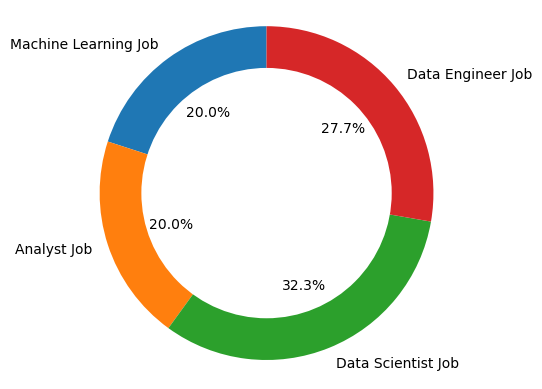

In [78]:
MLdf=df['job_title'].str.contains('Machine Learning').sum()
MLdf+=df['job_title'].str.contains('ML').sum()
MLdf=df['job_title'].str.contains('Analyst').sum()
DSdf=df['job_title'].str.contains('Data Scientist').sum()
DSdf+=df['job_title'].str.contains('Data Science').sum()
DEdf=df['job_title'].str.contains('Data Engineer').sum()
DEdf+=df['job_title'].str.contains('Data Engineering').sum()
labels = 'Machine Learning Job', 'Analyst Job', 'Data Scientist Job', 'Data Engineer Job'
sizes = [MLdf, MLdf, DSdf, DEdf]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')
ax1.axis('equal')
circle = plt.Circle(xy = (0,0), radius = .75, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show


Here we conclude that most of the job posts are related to Data Scientist, the second highest being Data Engineer, Machine Learning and Analyst with equal proportion.

<H3 style ="text-align: center",>SALARY VARIATION BASED ON EXPERIENCE LEVEL (2020-2022)</H3>

* **ABBREVIATION USED FOR EXPERIENCE LEVEL**

    * EN= Entry Level
    * ML= Mid Level
    * SE= Senior Level
    * EX= Executive


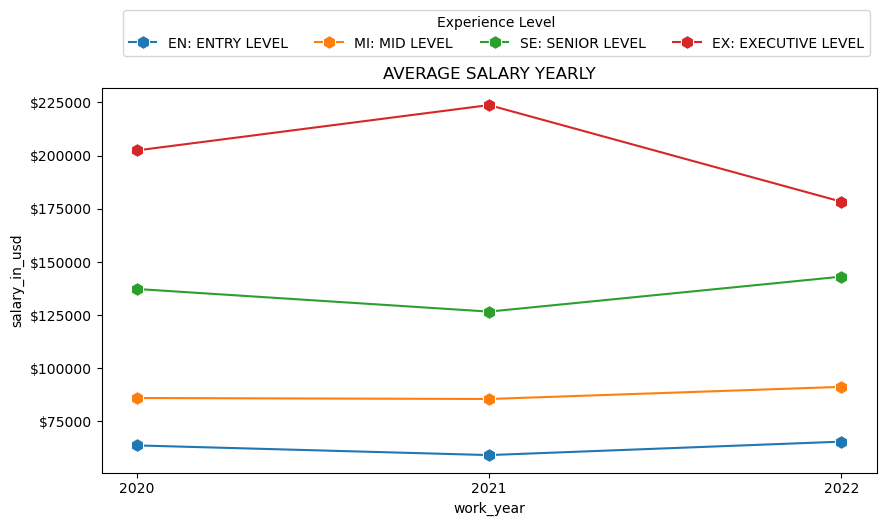

In [70]:
plt.figure(figsize=(10,5))
chart = sns.lineplot(x="work_year", y="salary_in_usd", data=df, hue = "experience_level", marker= "h",markersize = 10, ci = None)
chart.set_title('SALARY VARIATION BASED ON EXPERIENCE LEVEL (2020)', fontdict={'size': 15})
chart.set(title= 'AVERAGE SALARY YEARLY')
chart.set_xticks([2020,2021,2022])
chart.yaxis.set_major_formatter('${x:1.0f}')
plt.legend( ['EN: ENTRY LEVEL', 'MI: MID LEVEL', 'SE: SENIOR LEVEL', 'EX: EXECUTIVE LEVEL'],bbox_to_anchor =(1.00, 1.22), ncol = 4, title = "Experience Level")
fig.tight_layout()
for i in chart.containers:
    chart.bar_label(i,)


**For Entry Level and Mid Level** There was no such difference in average salary during 2020-22. Only in the year 2021, there has been some decrease in it. From 2020 to 2022, salaries for entry-level experience remained below USD 75000, and for mid-level experience it remained between USD 75000 to 100000.

**For Senior Level** Average salary decreased slightly in 2021 but increased to around 150000 USD in 2022.

**For Executive Level** This is the only experience that had the highest average salary in 2021 relative to experience at the rest of the level, but also had a decline in average salary in 2022 relative to all other categories. In 2020 it was around 200000 USD, in 2021 it increased to around 225000 USD, but in 2022 it fell to around 185000 USD, which was the lowest average salary of this category during 3 years.


<H3 style ="text-align: center",>SALARY VARIATION BASED ON COMPANY SIZE  (2020-2022)</H3>

* **ABBREVIATION USED FOR COMPANY SIZE**

    * S = Small Size
    * M = Midium Size
    * L = Large Size


Text(0.5, 1.0, 'SALARY VARIATION BASED ON COMPANY SIZE (2020-2022)')

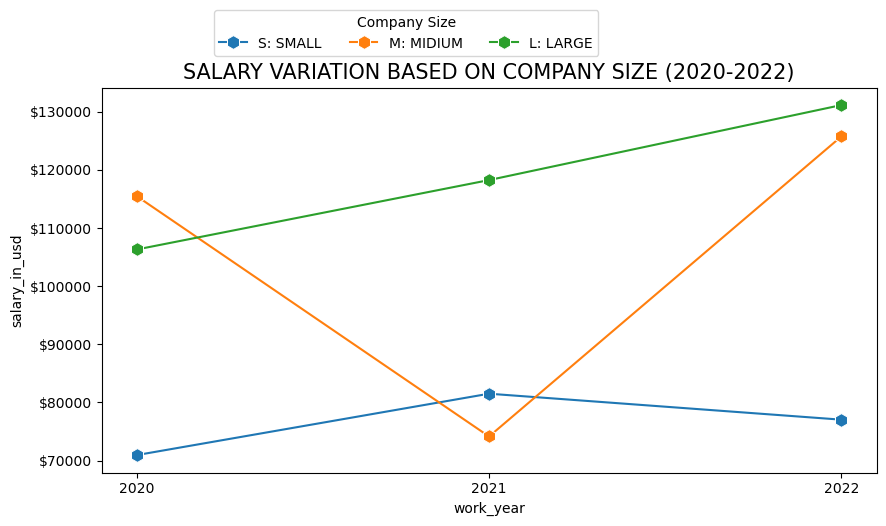

In [71]:
plt.figure(figsize=(10,5))
chart = sns.lineplot(x="work_year", y="salary_in_usd", data=df, hue = "company_size", marker= "h",markersize = 10, ci = None)
chart.yaxis.set_major_formatter('${x:1.0f}')
plt.xticks([2020,2021,2022])
plt.legend( ['S: SMALL', 'M: MIDIUM', 'L: LARGE'],bbox_to_anchor =(0.65, 1.22), ncol = 3, title = "Company Size")
chart.set_title('SALARY VARIATION BASED ON COMPANY SIZE (2020-2022)', fontdict={'size': 15})


**For small size companies** In 2020 we can find that the average salary of an employee was around 70000 USD but in 2021 it was increased by around 10000 USD and in 2022 it was cut by around 3000 USD.

**For medium sized companies** The average salary of an employee in the year 2020 was between 110000 and 120000 USD. In 2021, it was reduced to between 70000 and 80000 USD, which can be considered as the biggest decline during the whole 3 years. But in 2022 it again increased to between 120000 and 130000 USD.

**For large sized companies** Average salary of an employee increased continuously during the 3 year period (2020-22). Firstly in 2020 it was between 100000 and 110000 USD and in 2021 it was between 110000 and 120000 USD and in 2022 it was between 120000 and 130000 USD. So we can say that it was increased by 10000 USD every year.

* **Conclusion** It is clear that larger size companies can afford higher number of employees and their higher wages. But in medium-sized companies, it may happen that they can reduce the number of employees as well as the salary amount. And it's rare to see any big difference in pay differentials at smaller-sized companies.

<H3 style ="text-align: center",>SALARY VARIATION BASED ON EMPLOYMENT TYPE  (2020-2022)</H3>

* **ABBREVIATION USED FOR EMPLOYMENT TYPE**

    * PT = Part Time
    * FT = Full Time
    * FL = FreeLance
    * CT = Contractor time


Text(0.5, 1.0, 'SALARY VARIATION BASED ON EMPLOYMENT TYPE (2020-2022)')

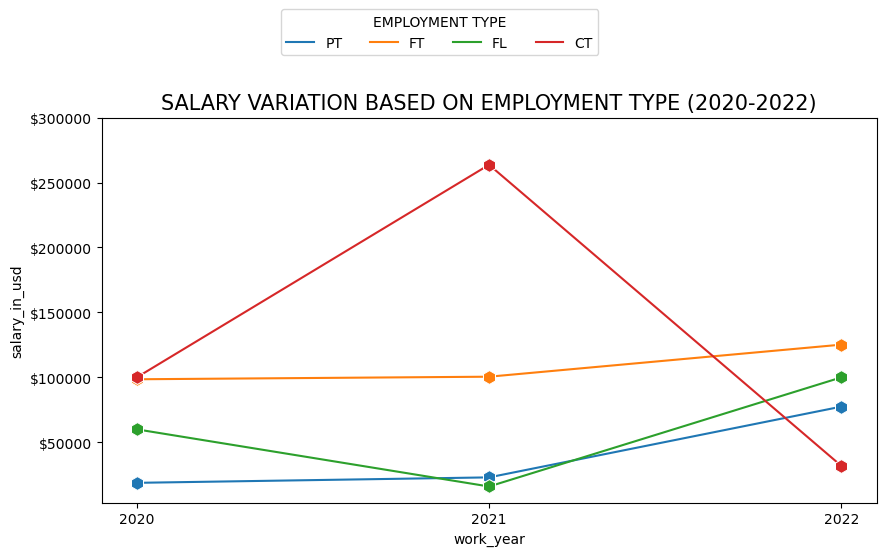

In [72]:
plt.figure(figsize=(10,5))
chart = sns.lineplot(x="work_year", y="salary_in_usd", data=df, hue = "employment_type", marker= "h",markersize = 10, ci = None)
chart.yaxis.set_major_formatter('${x:1.0f}')
plt.xticks([2020,2021,2022])
plt.yticks([50000,100000,150000,200000,250000,300000])
plt.legend(bbox_to_anchor =(0.65, 1.30), ncol = 4, title = "EMPLOYMENT TYPE")
chart.set_title('SALARY VARIATION BASED ON EMPLOYMENT TYPE (2020-2022)', fontdict={'size': 15})

**For Part Time Jobs** The average salary in this category had a steady increase for all three years, it was 20000 USD in 2020, increased slightly to around 25000 USD in 2021 and then to around 75000 USD in 2022.

**For Freelancer Jobs** The average salary in 2020 was around 60000 USD and in 2021 it decreased to around 22000 USD and in 2022 it again increased to around 90000 USD.

**For Full Time Jobs** Like part time jobs, the average salary for this category also continued to increase over the course of 3 years. Earlier it was around 100000 USD and in 2021 it increased very little after which it increased to around 100500 USD and in 2022 it again increased to around 110000 USD.

**For contract based jobs** The average salary for this category in the year 2020 was same as full time jobs Average salary in 2020. In 2021, it has increased to between 250000 and 280000 USD, which can be considered as the biggest increase during the whole 3 years. But in 2022, it was reduced again to about 25000 USD, which was similar to the average salary of part-time jobs in the year 2021. And we can consider this as the biggest fall in the entire 3 years.


* **Conclusion** Here we can conclude that the average salary package for full time jobs has been highest as compared to part time jobs and freelancer jobs except in the year 2020 and 2021 so it is likely to remain highest in future also . Since it was the covid period, when most of the companies were moving towards work from home mode or trying to reduce the number of employees, that period gave more opportunities for contract time based jobs.

<H3 style ="text-align: center",>SALARY VARIATION BASED ON REMOTE RATIO (2020-2022)</H3>

* **ABBREVIATION USED FOR REMOTE RATIO**

    * 0   : FULLY WORK FROM OFFICE
    * 50  : HYBRID
    * 100 : FULLY WORK FROM HOME

Text(0.5, 1.0, 'SALARY VARIATION BASED ON REMOTE RATIO (2020-2022)')

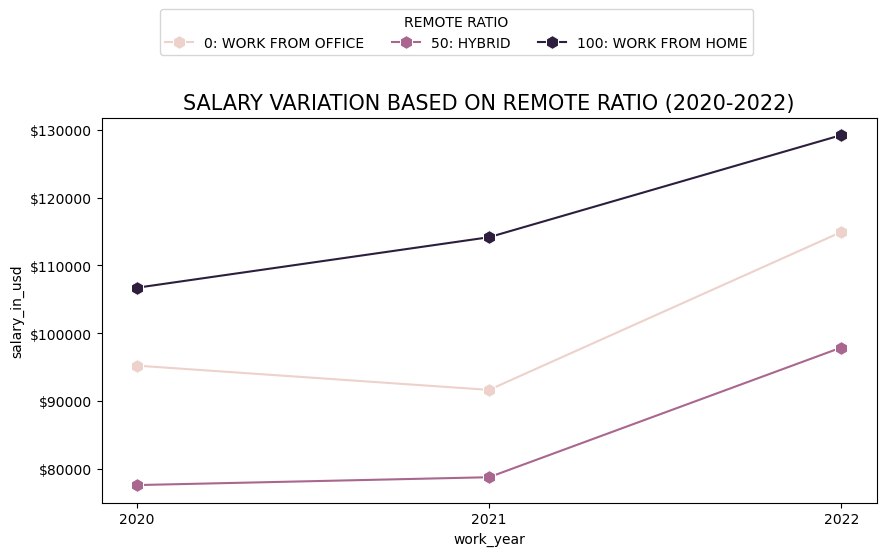

In [73]:
plt.figure(figsize=(10,5))
chart = sns.lineplot(x="work_year", y="salary_in_usd", data=df, hue = "remote_ratio", marker= "h",markersize = 10, ci = None)
chart.yaxis.set_major_formatter('${x:1.0f}')
plt.xticks([2020,2021,2022])
plt.legend(['0: WORK FROM OFFICE', '50: HYBRID', '100: WORK FROM HOME'],bbox_to_anchor =(0.85, 1.30), ncol = 4, title = "REMOTE RATIO")
chart.set_title('SALARY VARIATION BASED ON REMOTE RATIO (2020-2022)', fontdict={'size': 15})

**For Hybrid Working Mode** The average salary in the year 2020 was less than 80000 USD. And increased in 2021 but by a very small amount, after which it was around 80000 USD. But in 2022 it had increased to about 15000 USD and after that it had become about 95000 USD.

**For work from office mode** The average salary in 2020 was between 90000 and 100000 USD and in 2021 it decreased to around 91000 USD and in 2022 it again increased to around 112000 USD.

**For work from home mode** The average salary in 2020 was between 100000 and 110000 USD and in 2021 it increased to around 112000 USD and in 2022 it again increased to around 130000 USD.

* **Conclusion** Here we can conclude that the average salary package for work from home mode jobs is highest as compared to work from office and hybrid mode jobs.

<H3 style ="text-align: center",>REMOTE RATIO BASED ON COMPANY SIZE (2020-2022)</H3>

In [74]:
result_company_ratio=pd.crosstab(
index=df['company_size'],
columns=df['remote_ratio'],
normalize='index').round(4)*100 

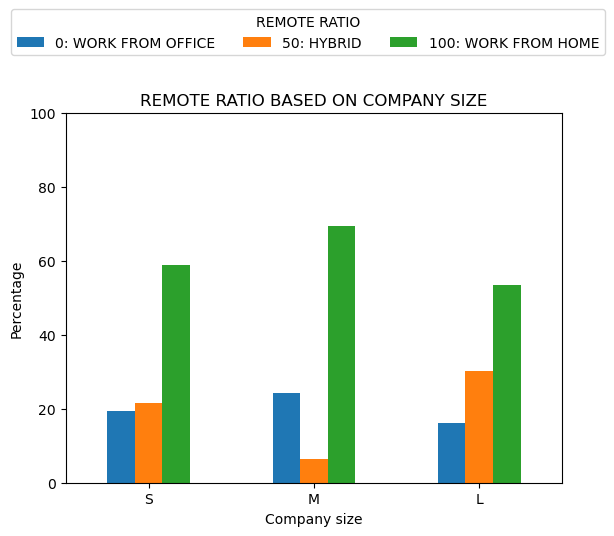

In [75]:
result_company_ratio.plot(kind='bar', rot=0, label='Remote ratio')
plt.title('REMOTE RATIO BASED ON COMPANY SIZE')
plt.ylabel('Percentage')
plt.ylim(bottom=0, top=100)
plt.xlabel('Company size')
plt.legend(['0: WORK FROM OFFICE', '50: HYBRID', '100: WORK FROM HOME'],bbox_to_anchor =(1.10, 1.30), ncol = 4, title = "REMOTE RATIO")

**Conclusion:** As we can see all companies, regardless of their company size, offer a high proportion of fully remote jobs and medium sized companies are offering fully remote jobs. Hybrid mode jobs are also preferred over work from office except in medium sized companies.

<H3 style ="text-align: center",>REMOTE RATIO BASED ON EXPERIENCE LEVEL (2020-2022)</H3>

In [76]:
result_company_ratio=pd.crosstab(
index=df['experience_level'],
columns=df['remote_ratio'],
normalize='index').round(4)*100 

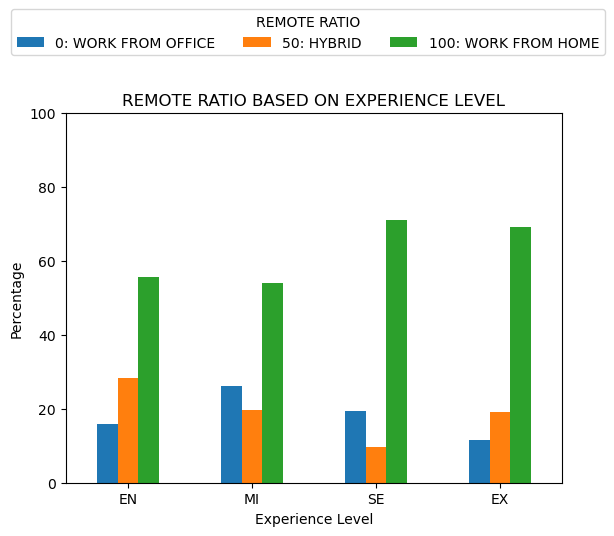

In [77]:
result_company_ratio.plot(kind='bar', rot=0, label='Remote ratio')
plt.title('REMOTE RATIO BASED ON EXPERIENCE LEVEL')
plt.ylabel('Percentage')
plt.ylim(bottom=0, top=100)
plt.xlabel('Experience Level')
plt.legend(['0: WORK FROM OFFICE', '50: HYBRID', '100: WORK FROM HOME'],bbox_to_anchor =(1.10, 1.30), ncol = 4, title = "REMOTE RATIO")

**Conclusion:** 
* At first I was expecting that entry level positions would have the highest percentage of working from the office but here overall the percentage of working from home is highest.

* If we consider all three ways of working for all four experience levels, we can find that working full time from home is the most offered way of working.

* Hybrid working mode is the most offered way of working compared to working from office for entry level and executive level. For mid-level and senior level, working from office is the more proposed mode as compared to hybrid mode.

* If we look at fully remote work, senior and executive jobs as a whole provide the highest percentage of fully remote positions.

### 8: Conclusion

**JOBS**
* Working year 2020 was the worst year for job seekers.
* Working year 2022 was golden year for job seekers
* Senior Level Experience has the top jobs count and Medium level has the second Highest.
* Full Time Job has the Highest job count.
* Majority of the Jobs are based on fully Work from Home and Work from Office has the second Highest.
* Majority of the jobs are offerd by the medium sized companies.
* Majority of jobs are based on Data Scientist Post then Data Engineer after that Data Analyst and Machine Learning.

**SALARIES**
* It is clear that larger size companies can afford higher number of employees and their higher wages. But in medium-sized companies, it may happen that they can reduce the number of employees as well as the salary amount. And it's rare to see any big difference in pay differentials at smaller-sized companies.

* The average salary package for full time jobs has been highest as compared to part time jobs and freelancer jobs except in the year 2020 and 2021 so it is likely to remain highest in future also . Since it was the covid period, when most of the companies were moving towards work from home mode or trying to reduce the number of employees, that period gave more opportunities for contract time based jobs.

* The average salary package for work from home mode jobs is highest as compared to work from office and hybrid mode jobs.
